In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import preprocessing
import scipy.stats as ss
from statsmodels.graphics.tsaplots import plot_acf
!pip install arch
from arch.unitroot import VarianceRatio
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.metrics import mean_absolute_error
from arch.unitroot import ADF
from statsmodels.tsa.stattools import acf

### QUESTION 1

In [ ]:
dataframe = pd.read_csv('WindGeneration.csv')

dataframe = dataframe.drop(['Date', 'Time'], axis=1)

# There is a missing value hence we need to interpolate

dataframe.interpolate(method="linear", inplace=True)

dataframe.set_index([pd.date_range('1/1/2014 01:00:00', periods=8760, freq='H')], inplace=True)

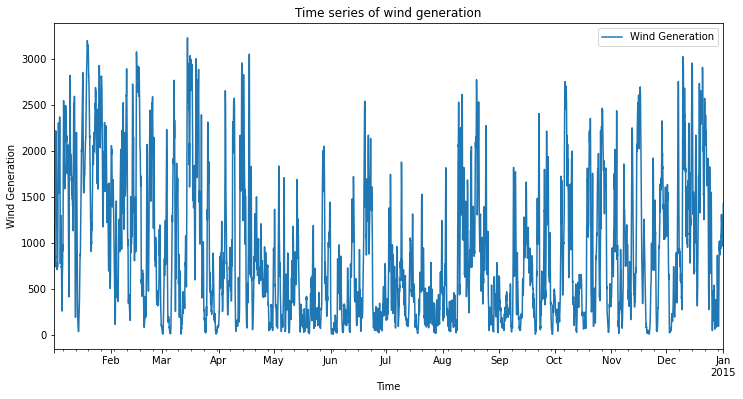

In [ ]:
dataframe.plot(figsize=(12,6))

# x-axis label 
plt.xlabel('Time') 

# frequency label 
plt.ylabel('Wind Generation') 

# plot title 
plt.title('Time series of wind generation') 

plt.show()

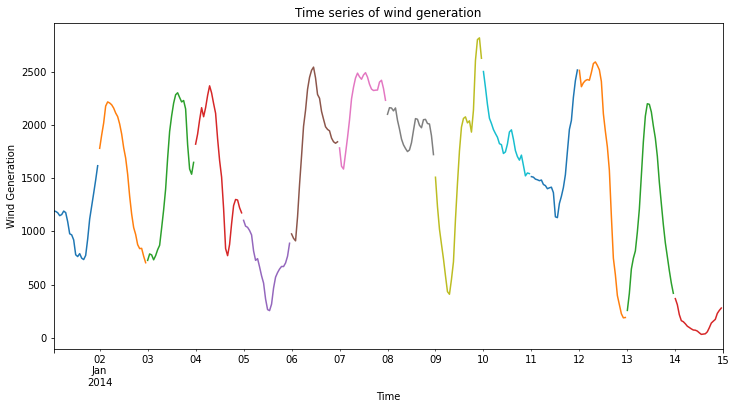

In [ ]:
dataframe.head(336).resample('1D').plot(figsize=(12,6))

# x-axis label 
plt.xlabel('Time') 

# frequency label 
plt.ylabel('Wind Generation') 

# plot title 
plt.title('Time series of wind generation') 

plt.show()

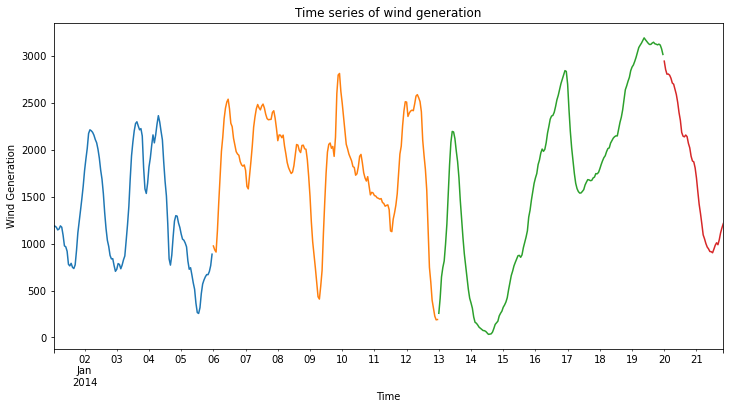

In [ ]:
dataframe.head(500).resample('1W').plot(figsize=(12,6))

# x-axis label 
plt.xlabel('Time') 

# frequency label 
plt.ylabel('Wind Generation') 

# plot title 
plt.title('Time series of wind generation') 

plt.show()

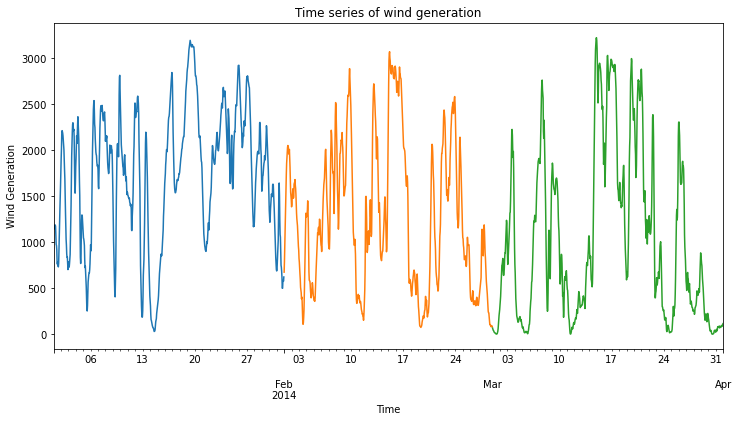

In [ ]:
dataframe.head(2160).resample('M').plot(figsize=(12,6))

# x-axis label 
plt.xlabel('Time') 

# frequency label 
plt.ylabel('Wind Generation') 

# plot title 
plt.title('Time series of wind generation') 

plt.show()

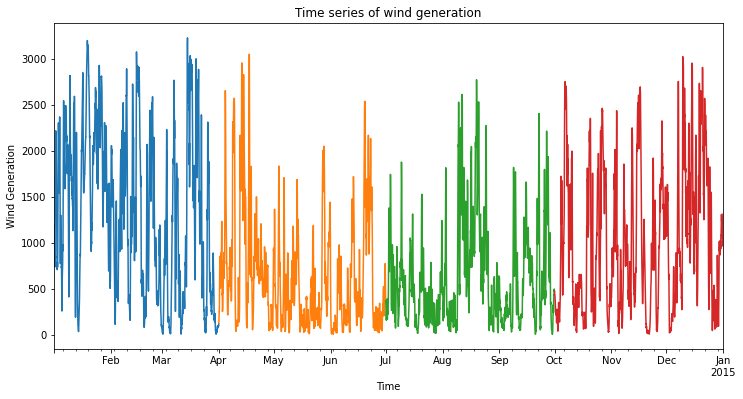

In [ ]:
dataframe.resample('Q').plot(figsize=(12,6))

# x-axis label 
plt.xlabel('Time') 

# frequency label 
plt.ylabel('Wind Generation') 

# plot title 
plt.title('Time series of wind generation') 

plt.show()

In [ ]:
dataframe['Wind Generation'].iloc[8759]

1424.8

### Question 2

In [ ]:
# function that squares values
def changeAsPercentofMax(p, c, m):
    return (c - p) * 100 / m


length = len(dataframe['Wind Generation'])

a = []
for i in range(length):
    if (i == 0):
        a.append(0)
    else:
        a.append(changeAsPercentofMax(dataframe['Wind Generation'].iloc[i - 1], dataframe['Wind Generation'].iloc[i], dataframe['Wind Generation'].max()))
   

changeWD = pd.DataFrame({'change':a})

changeWD.set_index([pd.date_range('1/1/2014 01:00:00', periods=8760, freq='H')], inplace=True)


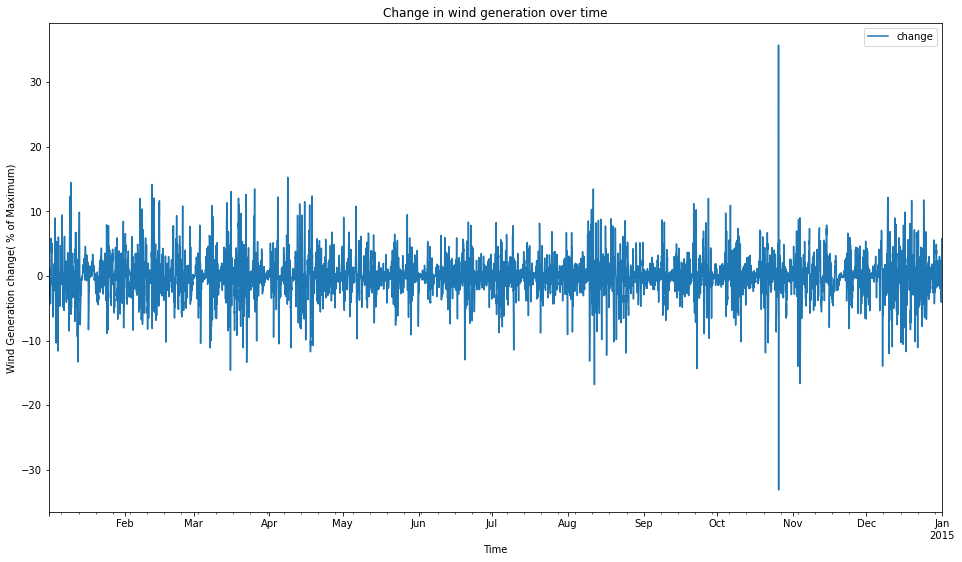

In [ ]:
changeWD.plot(figsize=(16,9))

# x-axis label 
plt.xlabel('Time') 

# frequency label 
plt.ylabel('Wind Generation change( % of Maximum)') 

# plot title 
plt.title('Change in wind generation over time') 

plt.show()

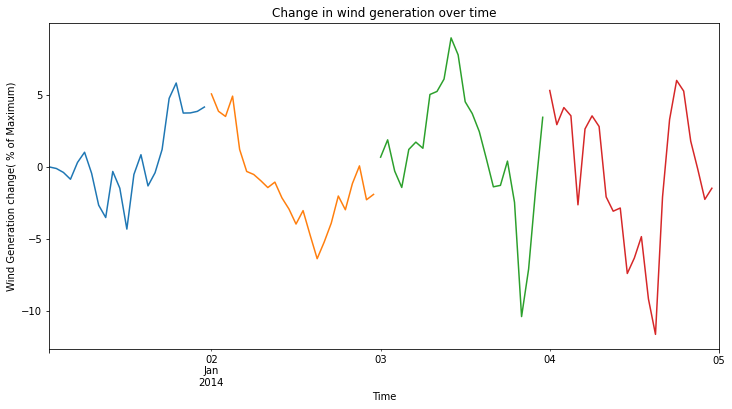

In [ ]:
changeWD.head(96).resample('1D').plot(figsize=(12,6))

# x-axis label 
plt.xlabel('Time') 

# frequency label 
plt.ylabel('Wind Generation change( % of Maximum)') 

# plot title 
plt.title('Change in wind generation over time') 

plt.show()

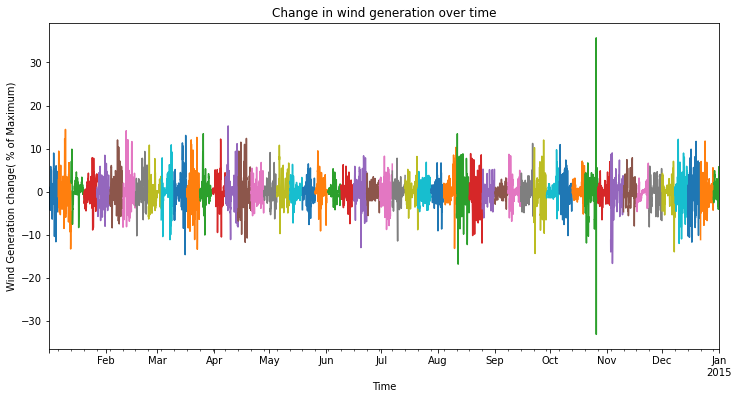

In [ ]:
changeWD.resample('1W').plot(figsize=(12,6))

# x-axis label 
plt.xlabel('Time') 

# frequency label 
plt.ylabel('Wind Generation change( % of Maximum)') 

# plot title 
plt.title('Change in wind generation over time') 

plt.show()

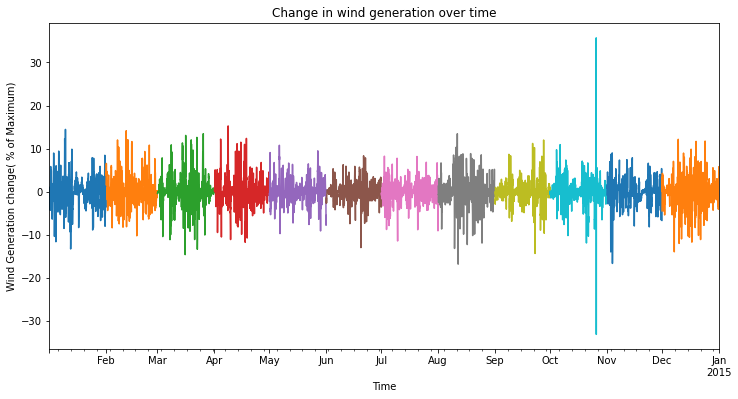

In [ ]:
changeWD.resample('M').plot(figsize=(12,6))

# x-axis label 
plt.xlabel('Time') 

# frequency label 
plt.ylabel('Wind Generation change( % of Maximum)') 

# plot title 
plt.title('Change in wind generation over time') 

plt.show()

In [ ]:
changeWD.resample('Q').plot(figsize=(12,6))

# x-axis label 
plt.xlabel('Time') 

# frequency label 
plt.ylabel('Wind Generation change( % of Maximum)') 

# plot title 
plt.title('Change in wind generation over time') 

plt.show()

### QUESTION 3

In [ ]:
# using the ramp function from question 2

rampResults = pd.DataFrame({'change':a})

rampResults

,change
0,0.000000
1,-0.108514
2,-0.381348
3,-0.855708
4,0.313139
...,...
8755,-0.936318
8756,1.085137
8757,5.772927
8758,2.917468


In [ ]:
rampResults.sort_values(by=['change'],  axis=0, ascending=True, inplace=False, kind='quicksort', ignore_index=False)

,change
7155,-33.130774
5348,-16.825820
7366,-16.664600
1777,-14.618342
6354,-14.348608
...,...
2014,13.458796
1006,14.143982
211,14.454021
2339,15.257022


In [ ]:
rampPositives = rampResults[(rampResults['change'] >= 0)]

rampNegatives = rampResults[(rampResults['change'] < 0) ]

rampPositives.sort_values(by=['change'],  axis=0, ascending=True, inplace=True, kind='quicksort', ignore_index=True)

rampNegatives.sort_values(by=['change'],  axis=0, ascending=True, inplace=True, kind='quicksort', ignore_index=True)

<ipython-input-81-6735a9280bcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rampPositives.sort_values(by=['change'],  axis=0, ascending=True, inplace=True, kind='quicksort', ignore_index=True)
<ipython-input-81-6735a9280bcb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rampNegatives.sort_values(by=['change'],  axis=0, ascending=True, inplace=True, kind='quicksort', ignore_index=True)


In [ ]:
# rampPositives.drop_duplicates(inplace = True)

rampPositives.tail(50)

,change
4336,9.493396
4337,9.654616
4338,9.698022
4339,9.719725
4340,9.722825
4341,9.856142
4342,9.862343
4343,10.225088
4344,10.277795
4345,10.358405


In [ ]:
# rampNegatives.drop_duplicates(inplace = True)

rampNegatives

,change
0,-33.130774
1,-16.825820
2,-16.664600
3,-14.618342
4,-14.348608
...,...
4369,-0.003100
4370,-0.003100
4371,-0.003100
4372,-0.003100


In [ ]:
# The ecdf
pos_ecdf = ECDF(rampPositives['change'].values)
neg_ecdf = ECDF(rampNegatives['change'].values)

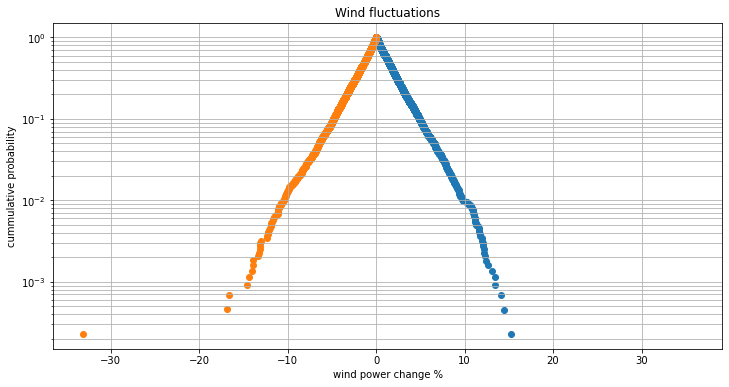

In [ ]:
plt.figure(figsize=(12,6))

# Display grid 
plt.grid(True, which ="both") 

# Linear X axis, Logarithmic Y axis
plt.yscale("log")

plt.scatter(pos_ecdf.x, 1- pos_ecdf.y) 

plt.scatter(neg_ecdf.x, neg_ecdf.y) 
  
# Provide the title for the semilogy plot 
plt.title('Wind fluctuations') 
  
# Give x axis label for the semilogy plot 
plt.xlabel('wind power change %') 
  
# Give y axis label for the semilogy plot 
plt.ylabel('cummulative probability') 
  
# Display the semilogy plot 
plt.show() 

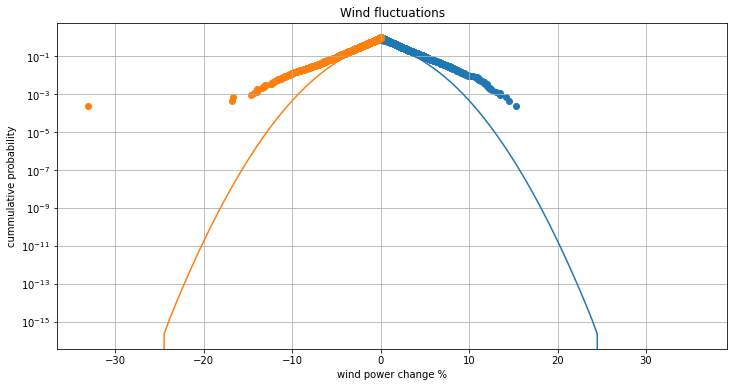

In [ ]:
# Create scaler

scaler = preprocessing.StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(rampResults.to_numpy())

# Show feature

df = pd.DataFrame(data=standardized, columns=["column1"])

mu = 0

sigma =  np.std(rampResults.to_numpy())

norm_cdf = ss.norm.cdf(np.linspace(0,30), mu, sigma)

plt.figure(figsize=(12,6))

# Display grid 
plt.grid(True, which ="both") 
  
# Linear X axis, Logarithmic Y axis 

plt.yscale("log")

plt.scatter(pos_ecdf.x, 1- pos_ecdf.y) 

plt.scatter(neg_ecdf.x, neg_ecdf.y)

plt.semilogy(np.linspace(0,30), 1-norm_cdf)

plt.semilogy(-np.linspace(0,30), 1-norm_cdf)

# Provide the title for the semilogy plot 
plt.title('Wind fluctuations') 
  
# Give x axis label for the semilogy plot 
plt.xlabel('wind power change %') 
  
# Give y axis label for the semilogy plot 
plt.ylabel('cummulative probability') 

plt.show()

### QUESTION 4

In [ ]:
# Investigate the variability in wind generation over different timescales
# Timescales: 1h, 2h, 3h, …., 24h
# Use the percentile analysis on the ramps
# r(t,d) =100 * [x (t + d) - x(t) ] / max(x)
# Iterate over the d param using d=1...24
# Compute the percentiles (1%, 5%, 95% and 99%) for each d
# Plot the results
# What did you learn?

def rampCalculator(a, b, m):
    return (b - a) * 100 / m

def getRampValList(df):
    length = len(df['Wind Generation'])
    a = []
    b = []
    for d in range (1, 25):
        for t in range(length):      
                a.append(rampCalculator(df['Wind Generation'].iloc[t - d], df['Wind Generation'].iloc[t], df['Wind Generation'].max()))
        b.append(a)
        a = []
    return b

rampArray = np.array([np.array(x) for x in getRampValList(dataframe)])

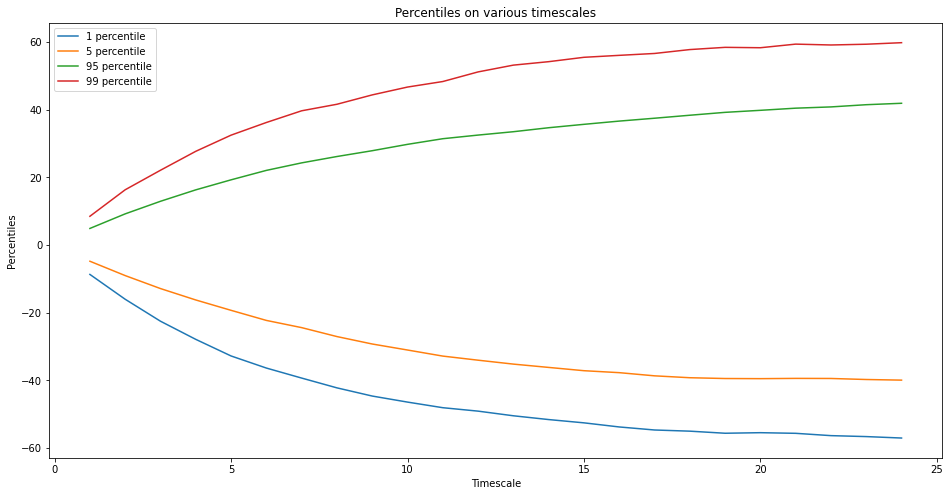

In [ ]:
plt.figure(figsize=(16,8))

# Provide the title for the semilogy plot 
plt.title('Percentiles on various timescales') 
  
# Give x axis label for the semilogy plot 
plt.xlabel('Timescale') 
  
# Give y axis label for the semilogy plot 
plt.ylabel('Percentiles')

percentiles = []

percent1 = []
percent5 = []
percent95 = []
percent99 = []

for i in range(24):
    a, b, c, d = np.percentile(rampArray[i], [1, 5, 95, 99])
    percent1.append(a)
    percent5.append(b)
    percent95.append(c)
    percent99.append(d)
    

colourlist = ["red", "blue", "green", "orange"]

labellist = ["1 Percentile","5 Percentile","95 Percentile", "99 Percentile"]


timescale = list(range(1,25))

plt.plot(timescale, percent1, label="1 percentile")
plt.plot(timescale, percent5, label="5 percentile")
plt.plot(timescale, percent95, label="95 percentile")
plt.plot(timescale, percent99, label="99 percentile")

plt.legend()
plt.show()


### QUESTION 5

In [ ]:
# calculating the autocorrelation

autocorr = acf(dataframe['Wind Generation'],nlags=240)

autocorr

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.99194162, 0.97259593, 0.94626036, 0.91599467,
       0.88370323, 0.85076678, 0.81829727, 0.78701873, 0.75736912,
       0.72964456, 0.70390268, 0.68003002, 0.6579522 , 0.63766143,
       0.61924944, 0.60284924, 0.58847368, 0.57613619, 0.5656716 ,
       0.55679733, 0.54900199, 0.54136517, 0.53280831, 0.52229552,
       0.50924516, 0.49426338, 0.47834813, 0.46230807, 0.44657262,
       0.43144262, 0.4171132 , 0.40369845, 0.39136015, 0.38007355,
       0.36965894, 0.35983338, 0.35058956, 0.34200151, 0.3342318 ,
       0.32748766, 0.32183687, 0.31741578, 0.31431228, 0.31229452,
       0.31081452, 0.3093474 , 0.30734622, 0.30397469, 0.29878049,
       0.29194839, 0.28423798, 0.27631235, 0.26870108, 0.26172928,
       0.25558261, 0.25046687, 0.24638076, 0.2431409 , 0.24044225,
       0.23795838, 0.2355911 , 0.23338996, 0.23158498, 0.23035142,
       0.22975363, 0.2298579 , 0.23067994, 0.23209602, 0.23382208,
       0.23542075, 0.23630298, 0.23574148, 0.23329704, 0.22927

Text(0, 0.5, 'Sample Autocorrelation')

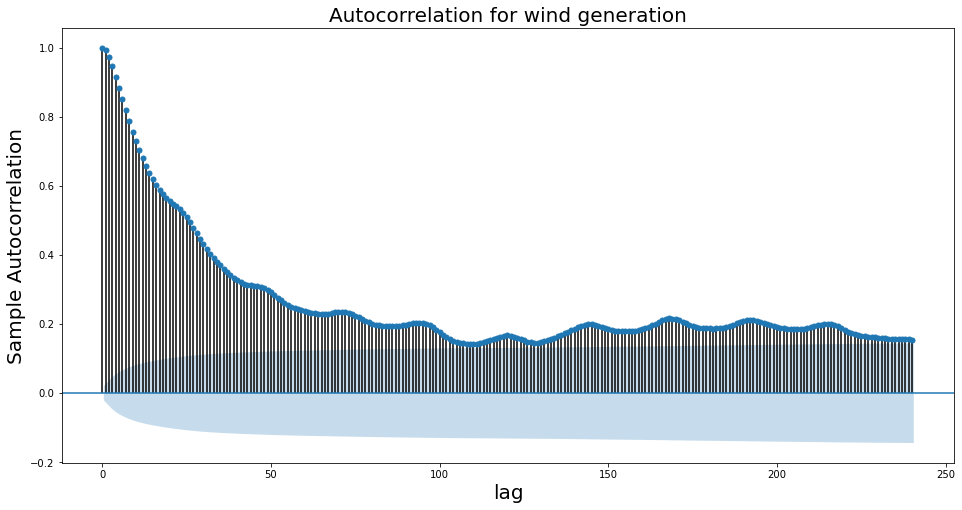

In [ ]:
# Calculate and plot the autocorrelation of wind generation for lags over 10 days.
# Comment on the structure of the autocorrelation

fig, ax = plt.subplots(figsize = (16, 8))

plot_acf(dataframe['Wind Generation'], lags=240, ax=ax, alpha=0.05)
plt.title("Autocorrelation for wind generation", size=20)
plt.xlabel("lag", size=20)
plt.ylabel("Sample Autocorrelation", size = 20)

### QUESTION 6

In [ ]:
autocorr = acf(rampResults,nlags=240)

autocorr

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00,  7.04045608e-01,  4.36180001e-01,  2.46152734e-01,
        1.26411808e-01,  3.98890438e-02, -2.90144076e-02, -7.35407453e-02,
       -1.01639384e-01, -1.20740729e-01, -1.23252544e-01, -1.15504178e-01,
       -1.11521611e-01, -1.11763663e-01, -1.17585558e-01, -1.25511946e-01,
       -1.26091757e-01, -1.27831606e-01, -1.17226747e-01, -9.95542651e-02,
       -6.77613383e-02, -1.02643400e-02,  5.69326309e-02,  1.21242867e-01,
        1.57294549e-01,  1.20039975e-01,  5.79840686e-02,  8.25253525e-03,
       -1.88755677e-02, -3.74276647e-02, -4.97104657e-02, -5.68415774e-02,
       -6.69178969e-02, -6.48468690e-02, -5.35719665e-02, -3.64015485e-02,
       -3.59899288e-02, -4.06410165e-02, -5.03478040e-02, -6.28680933e-02,
       -6.77480771e-02, -7.66736869e-02, -8.17890063e-02, -6.73262572e-02,
       -3.34811455e-02, -2.03055903e-04,  3.38067540e-02,  8.52294235e-02,
        1.13025670e-01,  1.01998815e-01,  5.50971637e-02,  1.29435235e-02,
       -2.00796109e-02, -

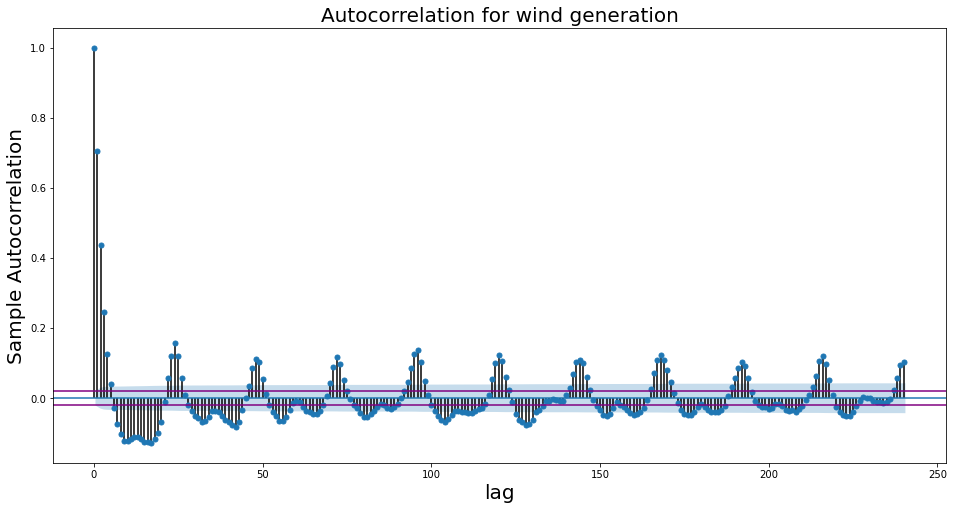

In [ ]:
# Calculate and plot the autocorrelation of change in wind generation for lags over 10 days.
# Include horizontal lines to detect statistically significance values(p<0.05).
# Is there any evidence of diurnal seasonality? Might it be more appropriate to model the change in wind generation than the wind generation?

fig, ax = plt.subplots(figsize = (16, 8))

plot_acf(rampResults, lags=240, ax=ax, alpha=0.05)
plt.title("Autocorrelation for wind generation", size=20)
plt.xlabel("lag", size=20)
plt.ylabel("Sample Autocorrelation", size = 20)


plt.axhline(+1.92/np.sqrt(len(dataframe['Wind Generation'])), color = "purple", label = "confidence interval")

plt.axhline(-1.92/np.sqrt(len(dataframe['Wind Generation'])), color = "purple")

### QUESTION 7

In [ ]:
# Use a variance ratio test to investigate the structure of the wind generation time series.

vr = VarianceRatio(dataframe['Wind Generation'], 240)
print(vr.summary().as_text())

# Can the null hypothesis of a random walk be rejected?


     Variance-Ratio Test Results     
Test Statistic                 -2.558
P-value                         0.011
Lags                              240
-------------------------------------

Computed with overlapping blocks (de-biased)


In [ ]:
# Is there evidence of either mean-reversion or mean-aversion?


adf = ADF(dataframe['Wind Generation']) # changing the number of lags makes no difference
adf.lags = 240
print(adf.summary().as_text())

C:\ProgramData\Anaconda3\lib\site-packages\arch\unitroot\unitroot.py:624: FutureWarning: Mutating unit root tests is deprecated and will raise an error in the first release of arch 5.x after August 2020. Create new test objects to change test parametrization.

  warnings.warn(MUTATING_WARNING, FutureWarning)


   Augmented Dickey-Fuller Results   
Test Statistic                 -4.142
P-value                         0.001
Lags                              240
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
print("Since the calculated value of the test statistic is more negative any of the critical values at the 1, 5 or 10 percent level")
print("we reject the null hypothesis and thus we have likely found a mean reverting time series")

Since the calculated value of the test statistic is more negative any of the critical values at the 1, 5 or 10 percent level
we reject the null hypothesis and thus we have likely found a mean reverting time series


### QUESTION 8

In [ ]:
# Question 8
# 1. Test window size using n = [1: 24]
# 2. For each n, calculate the simple moving average (SMA)
# MATLAB: tsmovavg or equivalent  Python: df.rolling()
# Calculate the mean absolute error (MAE) between the SMA and the actual wind power.
# 3. For which n, do you obtain the minimum MAE?
# 4. Is there a simple benchmark that improves on the persistence  benchmark?

In [ ]:
movingAverageDF = pd.DataFrame()

for n in range (1, 25):
    roll = "Rolling " + str(n)
    movingAverageDF[roll] = dataframe['Wind Generation'].rolling(n,  min_periods=1).mean()

movingAverageDF

,Rolling 1,Rolling 2,Rolling 3,Rolling 4,Rolling 5,Rolling 6,Rolling 7,Rolling 8,Rolling 9,Rolling 10,...,Rolling 15,Rolling 16,Rolling 17,Rolling 18,Rolling 19,Rolling 20,Rolling 21,Rolling 22,Rolling 23,Rolling 24
2014-01-01 01:00:00,1190.1,1190.10,1190.100000,1190.100000,1190.100000,1190.100000,1190.100000,1190.100000,1190.100000,1190.100000,...,1190.100000,1190.100000,1190.100000,1190.100000,1190.100000,1190.100000,1190.100000,1190.100000,1190.100000,1190.100000
2014-01-01 02:00:00,1186.6,1188.35,1188.350000,1188.350000,1188.350000,1188.350000,1188.350000,1188.350000,1188.350000,1188.350000,...,1188.350000,1188.350000,1188.350000,1188.350000,1188.350000,1188.350000,1188.350000,1188.350000,1188.350000,1188.350000
2014-01-01 03:00:00,1174.3,1180.45,1183.666667,1183.666667,1183.666667,1183.666667,1183.666667,1183.666667,1183.666667,1183.666667,...,1183.666667,1183.666667,1183.666667,1183.666667,1183.666667,1183.666667,1183.666667,1183.666667,1183.666667,1183.666667
2014-01-01 04:00:00,1146.7,1160.50,1169.200000,1174.425000,1174.425000,1174.425000,1174.425000,1174.425000,1174.425000,1174.425000,...,1174.425000,1174.425000,1174.425000,1174.425000,1174.425000,1174.425000,1174.425000,1174.425000,1174.425000,1174.425000
2014-01-01 05:00:00,1156.8,1151.75,1159.266667,1166.100000,1170.900000,1170.900000,1170.900000,1170.900000,1170.900000,1170.900000,...,1170.900000,1170.900000,1170.900000,1170.900000,1170.900000,1170.900000,1170.900000,1170.900000,1170.900000,1170.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 20:00:00,996.8,1011.90,1015.233333,1001.950000,1010.860000,1038.683333,1055.671429,1058.637500,1056.355556,1059.580000,...,1111.753333,1119.156250,1126.758824,1133.150000,1138.310526,1143.515000,1151.223810,1157.654545,1160.991304,1159.995833
2014-12-31 21:00:00,1031.8,1014.30,1018.533333,1019.375000,1007.920000,1014.350000,1037.700000,1052.687500,1055.655556,1053.900000,...,1098.993333,1106.756250,1114.017647,1121.483333,1127.815789,1132.985000,1138.195238,1145.795455,1152.182609,1155.608333
2014-12-31 22:00:00,1218.0,1124.90,1082.200000,1068.400000,1059.100000,1042.933333,1043.442857,1060.237500,1071.055556,1071.890000,...,1097.320000,1106.431250,1113.300000,1119.794444,1126.563158,1132.325000,1137.033333,1141.822727,1148.934783,1154.925000
2014-12-31 23:00:00,1312.1,1265.05,1187.300000,1139.675000,1117.140000,1101.266667,1081.385714,1077.025000,1088.222222,1095.160000,...,1105.200000,1110.743750,1118.529412,1124.344444,1129.915789,1135.840000,1140.885714,1144.990909,1149.226087,1155.733333


In [ ]:
mae = []

for n in range (1, 25):
    roll = "Rolling " + str(n)
    mae.append(mean_absolute_error(dataframe['Wind Generation'], movingAverageDF[roll]))

location = mae.index(min(mae))


mae

print ("The minimum MAE was obtained for n : ")
print(location + 1) # added one as the indexes of the list start from zero

The minimum MAE was obtained for n : 
1


### QUESTION 9

In [ ]:
# Question 9
# ● For each forecast horizon n = [1 : 24]
# ● Calculate the persistence of n  X_predicted(t) = X(t-n)
# ● Handle missing or NaN values
# ● Calculate the mean absolute error (MAE) between the predicted wind power and the actual wind power
# ● Plot MAE as a percentage of the maximum generation for the  persistence benchmark. Hint (X = timescale, Y = max MAE percentage wind generation)

persistanceDF = movingAverageDF

for n in range (1,25):
    roll = "Rolling " + str(n)
    persist = "Persistance " + str(n)
    for i in range(len(dataframe['Wind Generation'])):
        if i >= n:
            persistanceDF[roll].iloc[i] = dataframe['Wind Generation'].iloc[i - n]           
        else:
            persistanceDF[roll].iloc[i] = np.nan
    persistanceDF.rename(columns={roll: persist}, inplace=True)
    
persistanceDF  

,Persistance 1,Persistance 2,Persistance 3,Persistance 4,Persistance 5,Persistance 6,Persistance 7,Persistance 8,Persistance 9,Persistance 10,...,Persistance 15,Persistance 16,Persistance 17,Persistance 18,Persistance 19,Persistance 20,Persistance 21,Persistance 22,Persistance 23,Persistance 24
2014-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,1190.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,1186.6,1190.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,1174.3,1186.6,1190.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 05:00:00,1146.7,1174.3,1186.6,1190.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 20:00:00,1027.0,1021.9,962.1,1046.5,1177.8,1157.6,1079.4,1038.1,1088.6,1194.2,...,1230.2,1248.4,1241.8,1231.2,1242.4,1305.4,1292.7,1234.4,1137.1,1126.0
2014-12-31 21:00:00,996.8,1027.0,1021.9,962.1,1046.5,1177.8,1157.6,1079.4,1038.1,1088.6,...,1223.2,1230.2,1248.4,1241.8,1231.2,1242.4,1305.4,1292.7,1234.4,1137.1
2014-12-31 22:00:00,1031.8,996.8,1027.0,1021.9,962.1,1046.5,1177.8,1157.6,1079.4,1038.1,...,1243.1,1223.2,1230.2,1248.4,1241.8,1231.2,1242.4,1305.4,1292.7,1234.4
2014-12-31 23:00:00,1218.0,1031.8,996.8,1027.0,1021.9,962.1,1046.5,1177.8,1157.6,1079.4,...,1193.9,1243.1,1223.2,1230.2,1248.4,1241.8,1231.2,1242.4,1305.4,1292.7


In [ ]:
mae = []
maePercentToMaxGen = []
timescale = []

for n in range (1, 25):
    persist = "Persistance " + str(n)
    mae.append(mean_absolute_error(dataframe['Wind Generation'].iloc[n:8760], persistanceDF[persist].iloc[n:8760]))
    maePercentToMaxGen.append((mean_absolute_error(dataframe['Wind Generation'].iloc[n:8760], persistanceDF[persist].iloc[n:8760]) / dataframe['Wind Generation'].max()) * 100)
    timescale.append(n)
    

mae

[66.50082201164516,
 124.19157341858872,
 174.80206691789425,
 219.53042485153037,
 259.5329754426042,
 295.58385880740235,
 327.6606192162687,
 356.41271709323587,
 382.1856130727917,
 405.26883428571426,
 425.64893130643503,
 443.95149748513944,
 460.1607751228993,
 474.99656986050763,
 488.76926243567755,
 500.9224725526076,
 511.32303557131416,
 520.2882063601007,
 527.7837775998169,
 534.0346453089246,
 539.4522027691955,
 544.5555848020142,
 550.4883598489183,
 557.6682234432234]

In [ ]:
maePercentToMaxGen

[2.06178526730468,
 3.8504239293913534,
 5.41954693736883,
 6.806300764293742,
 8.046536102269616,
 9.164254319073676,
 10.158759199363448,
 11.05018655339604,
 11.84924701037985,
 12.564917042404486,
 13.196779664737242,
 13.764230715109427,
 14.266781643296934,
 14.726749236079481,
 15.153756508826117,
 15.530553498871694,
 15.853011582170092,
 16.130966898992398,
 16.363358888814314,
 16.557160206762713,
 16.72512565167717,
 16.883350431016748,
 17.06728963381033,
 17.28989345331504]

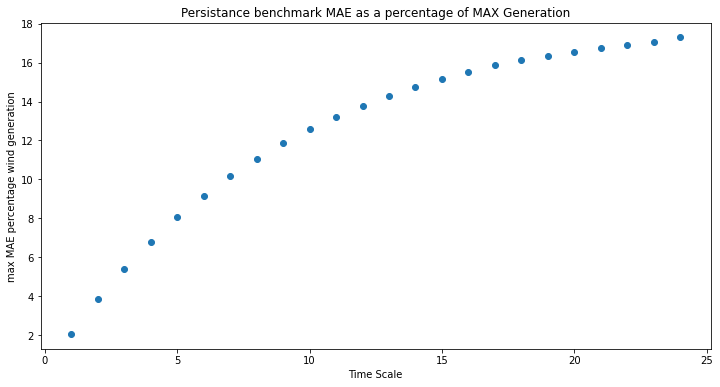

In [ ]:
# ● Plot MAE as a percentage of the maximum generation for the  persistence benchmark. Hint (X = timescale, Y = max MAE percentage wind generation)

plt.figure(figsize=(12,6))

# x-axis label 
plt.xlabel('Time Scale') 

# y-axis label 
plt.ylabel('max MAE percentage wind generation') 

# plot title 
plt.title('Persistance benchmark MAE as a percentage of MAX Generation') 

plt.scatter(timescale, maePercentToMaxGen)

plt.show()

### QUESTION 10

In [ ]:
# ●Understand an AutoRegressive Integrated Moving Average (ARIMA) model
# ●Find parameters it takes (p, d, q)
# ●Loop through a range of parameters (p and q = [1:4]) to find the optimal parameters
#    	○Pass the parameters to the arima model
#        ○Fit and return the model estimates
#        ○calculate the AIC and BIC from the estimation

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

results = []
aicplusbicsum = []
for p in range (1,5):
    for q in range (1,5):
        model = ARIMA(dataframe['Wind Generation'], order=(p,1,q))
        model_fit = model.fit()
        # print(model_fit.summary()) # will give statistics such as AIC and BIC
        results.append([p,q,model_fit.aic, model_fit.bic])
        aicplusbicsum.append(model_fit.aic + model_fit.bic)
              
results

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


[[1, 1, 98977.62335633364, 98998.85686740013],
 [1, 2, 98964.02341380891, 98992.33476189757],
 [1, 3, 98965.73899177172, 99001.12817688254],
 [1, 4, 98965.31660441084, 99007.78362654381],
 [2, 1, 98853.27625815533, 98881.58760624398],
 [2, 2, 98784.09759608483, 98819.48678119565],
 [2, 3, 98968.00336483604, 99010.47038696901],
 [2, 4, 98811.99725111047, 98861.54211026561],
 [3, 1, 98781.70489364745, 98817.09407875827],
 [3, 2, 98783.50317588697, 98825.97019801995],
 [3, 3, 98788.06793780984, 98837.61279696498],
 [3, 4, 98786.35779740833, 98842.98049358564],
 [4, 1, 98965.32899120731, 99007.79601334028],
 [4, 2, 98785.9774889169, 98835.52234807205],
 [4, 3, 98968.09851340804, 99024.72120958535],
 [4, 4, 98980.52542378638, 99044.22595698586]]

In [ ]:
minaicplusbicIndex = aicplusbicsum.index(min(aicplusbicsum))

print("The value of p is ")
print(results[minaicplusbicIndex][0])

print("The value of q is ")
print(results[minaicplusbicIndex][1])

The value of p is 
3
The value of q is 
1
